In [61]:
import numpy as np
import pandas as pd 
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,LinearRegression
from sklearn.model_selection import cross_val_score,KFold,train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor,kneighbors_graph,KNeighborsTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import *
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import * 
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import sys
import sklearn
import matplotlib
# z = (x - u) / s

In [13]:
print('Python: {}'.format(sys.version))
print('Scipy: {}'.format(scipy.__version__))
print('Numpy: {}'.format(np.__version__))
print('Pandas: {}'.format(pd.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(sns.__version__))
print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.12.1 (tags/v3.12.1:2305ca5, Dec  7 2023, 22:03:25) [MSC v.1937 64 bit (AMD64)]
Scipy: 1.11.4
Numpy: 1.26.3
Pandas: 2.1.4
Matplotlib: 3.8.2
Seaborn: 0.12.2
Sklearn: 1.4.0


In [31]:
dataset = pd.read_csv('iris_data.csv',names=['sepal-length','sepal-width','patel-length','patel-width','class'])
dataset



,sepal-length,sepal-width,patel-length,patel-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [32]:
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [17]:
dataset.describe()

,sepal-length,sepal-width,patel-length,patel-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

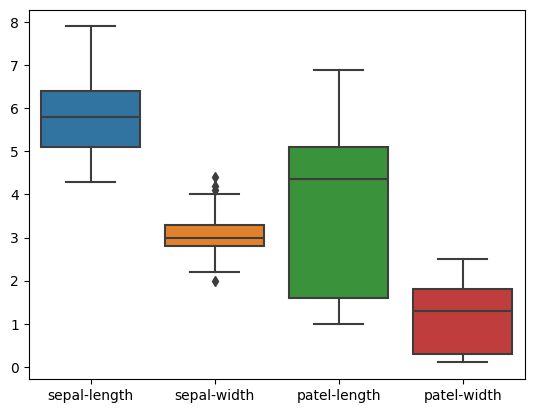

In [18]:
sns.boxplot(dataset)

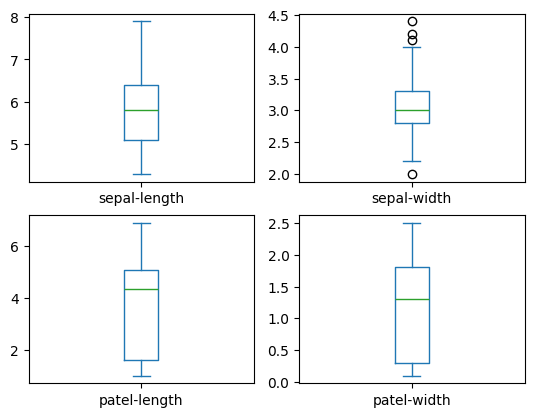

In [19]:
dataset.plot(kind='box',subplots = True, layout = (2,2), sharex = False, sharey = False)
plt.show()

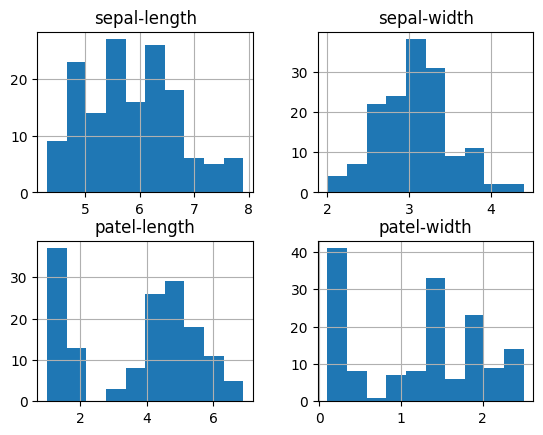

In [25]:
dataset.hist()
plt.show()

In [29]:
# plt.hist(x='sepal-length',y='petel-length',data=dataset)

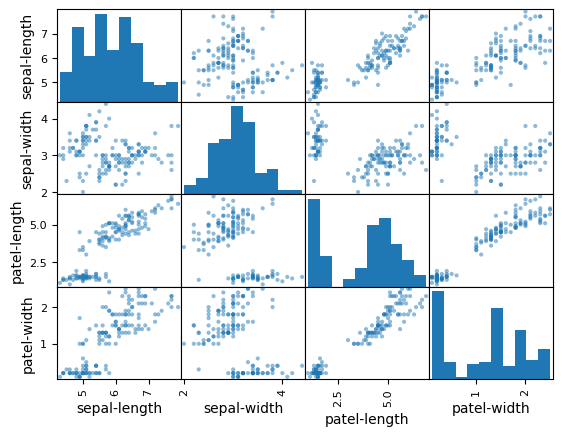

In [4]:
scatter_matrix(dataset)
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

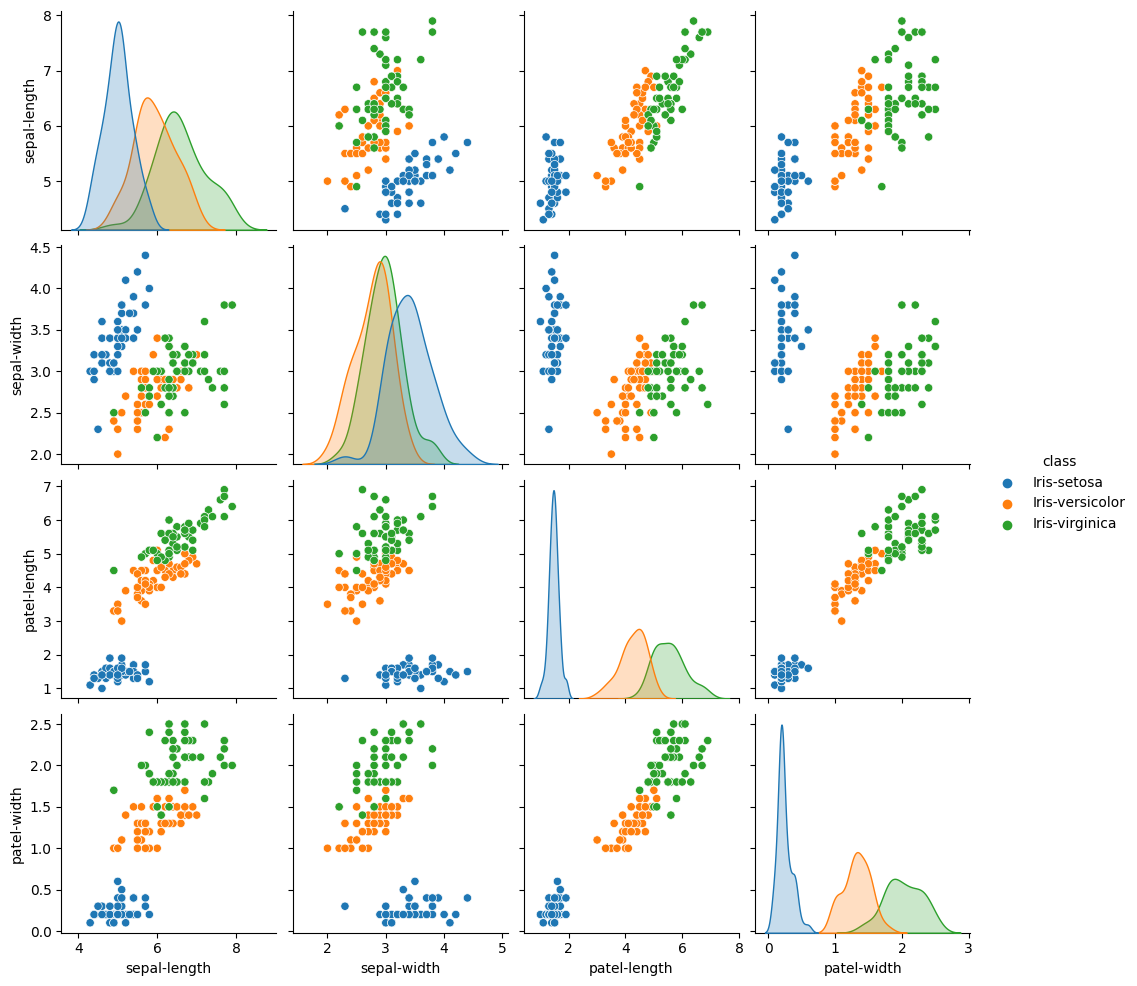

In [30]:
sns.pairplot(data=dataset,hue='class')

In [34]:
# divided data into train is 80% and test is 20% 
dataset = dataset.values
x = dataset[:,0:4]
y = dataset[:,4]
validation_size = 0.20
seed = 7  # 6
scoring = 'accuracy'
# print(x,y)

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=validation_size,random_state = seed)

In [42]:
# For Random Forest Classifier (used for classification tasks)
from sklearn.ensemble import RandomForestClassifier

# For Random Forest Regressor (used for regression tasks)
from sklearn.ensemble import RandomForestRegressor

In [38]:
# For classification
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_classifier.fit(x_train, y_train)

# For regression
# rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_regressor.fit(x_train, y_train)

In [47]:
#spot check algorithms
models=[]
#models.append(('LinearRegression:',LinearRegression()))
models.append(('LR:',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA:',LinearDiscriminantAnalysis()))
models.append(('KNN:',KNeighborsClassifier()))
models.append(('DTC(CART:)',DecisionTreeClassifier()))
#models.append(('DTR:',DecisionTreeRegressor()))
models.append(('RFC: ',RandomForestClassifier(n_estimators=100)))
# models.append(('RFR: ',RandomForestRegressor(n_estimators=100)))
models.append(('NB:',GaussianNB()))
models.append(('SVC',SVC(gamma='auto')))

results =[]
names = []

for name,model in models:
    kfold = KFold(n_splits = 10, random_state = seed,shuffle=True)
    
    cv_results = cross_val_score(model,x_train,y_train,cv= kfold,scoring =scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s : %f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)
#End for loop 

LR: : 0.958333 (0.055902)
LDA: : 0.975000 (0.038188)
KNN: : 0.983333 (0.033333)
DTC(CART:) : 0.950000 (0.076376)
RFC:  : 0.966667 (0.040825)
NB: : 0.966667 (0.040825)
SVC : 0.991667 (0.025000)


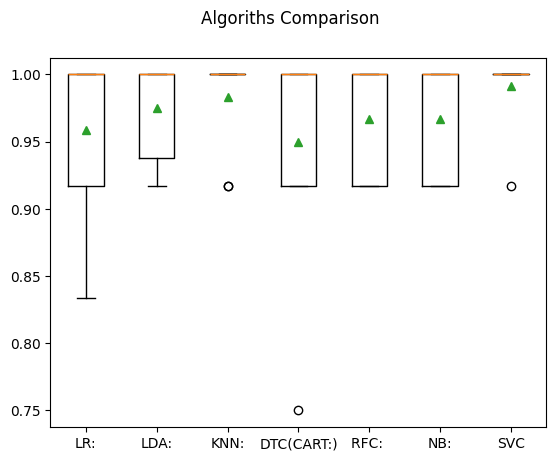

In [48]:
# comparing Algorithms and select the best model 
fig = plt.figure()
fig.suptitle('Algoriths Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results,showmeans=True)
ax.set_xticklabels(names)
plt.show()

In [49]:
#make Prediction 
svm = SVC(gamma ='auto')
svm.fit(x_train,y_train)
pre_y = svm.predict(x_test)
print(accuracy_score(y_test,pre_y))
print(confusion_matrix(y_test,pre_y))
print(classification_report(y_test,pre_y))


0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



In [50]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pre_y = knn.predict(x_test)
print(accuracy_score(y_test,pre_y))
print(confusion_matrix(y_test,pre_y))
print(classification_report(y_test,pre_y))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



In [51]:
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model
from sklearn.metrics import accuracy_score,mean_squared_error as mse


iris_data = datasets.load_iris()
# split data into training or testing set

x,y = iris_data.data,iris_data.target
# print(x,y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=42)

# plt.scatter(x_train, y_train) # x_test, y_pred
# #plt.plot(x_train,y_train)  # x_test,y_test
# plt.xlabel("True Values")
# plt.ylabel("Predictions")
# plt.title("True Values vs Predictions")
# plt.show()



accuracy_score: 1.0


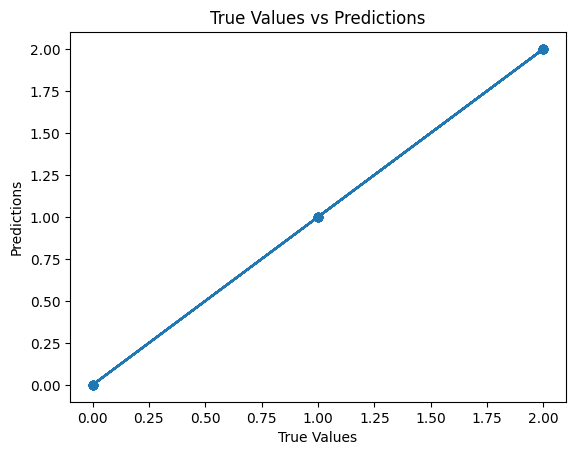

In [54]:
#train Model ...........
Lr = linear_model.LinearRegression()
Lg = linear_model.LogisticRegression()

Lr.fit(x_train,y_train)
Lg.fit(x_train,y_train)

# test accuracy score
y_pred = Lg.predict(x_test)
print(f"accuracy_score: {accuracy_score(y_test,y_pred)}")

plt.scatter(y_test, y_pred)
plt.plot(y_test,y_pred)  # x_test,
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()


Mean Squared Error: 0.0


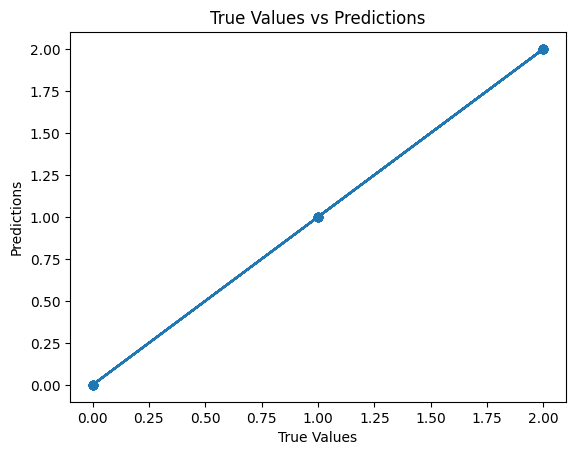

In [55]:
print(f"Mean Squared Error: {mse(y_test,y_pred)}")
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_pred) 
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()


accuracy_score Error: 1.0


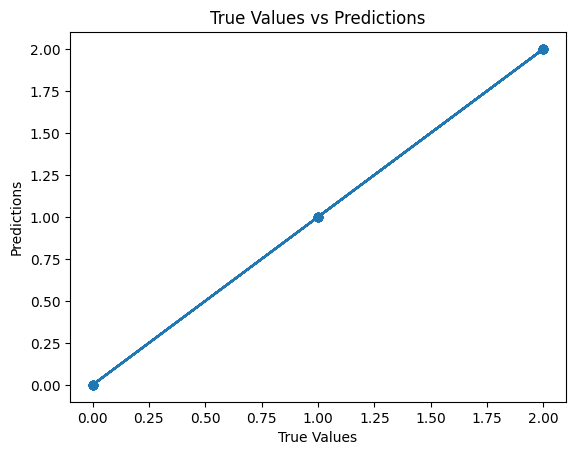

In [14]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

Dt = DecisionTreeRegressor()
Dt.fit(x_train,y_train)

y_pred = Dt.predict(x_test)
print(f"accuracy_score Error: {accuracy_score(y_test,y_pred)}")

plt.scatter(y_test, y_pred)
plt.plot(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()

Mean Squared Error: 0.0


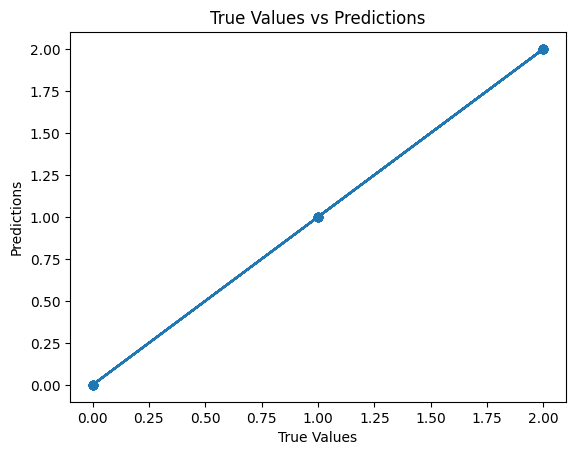

In [56]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

Dt = DecisionTreeRegressor()
Dt.fit(x_train,y_train)

y_pred = Dt.predict(x_test)
print(f"Mean Squared Error: {mse(y_test,y_pred)}")

plt.scatter(y_test, y_pred)
plt.plot(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()

Accuracy: 1.0


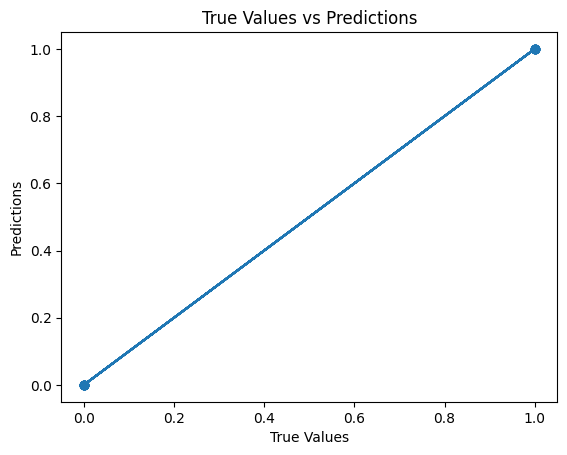

In [57]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load iris dataset and use only two classes: setosa and versicolor for binary classification
iris = load_iris()
X = iris.data[:100]
y = iris.target[:100]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Measure accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

plt.scatter(y_test, y_pred)
plt.plot(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()

Mean Squared Error: 2900.19362849348


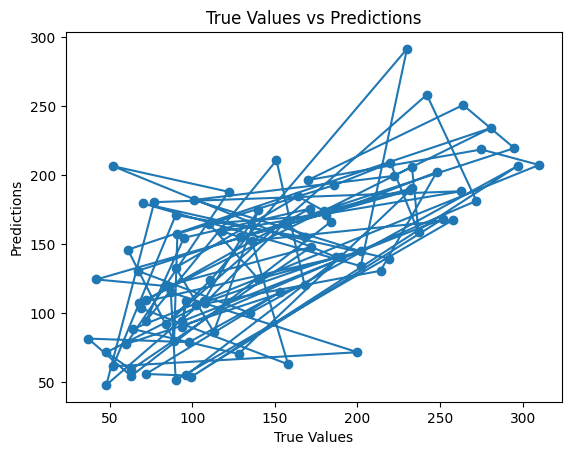

In [58]:
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model
from sklearn.metrics import accuracy_score,mean_squared_error as mse
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Features (X) and target (y)
X, y = diabetes.data, diabetes.target


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression,LogisticRegression

model = LinearRegression()
# model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# accuracy_score = accuracy_score(y_test, y_pred)
# print(f"Accuracy Score: {accuracy_score}")
plt.scatter(y_test, y_pred)
plt.plot(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()

Mean Squared Error: 2065.425563237292


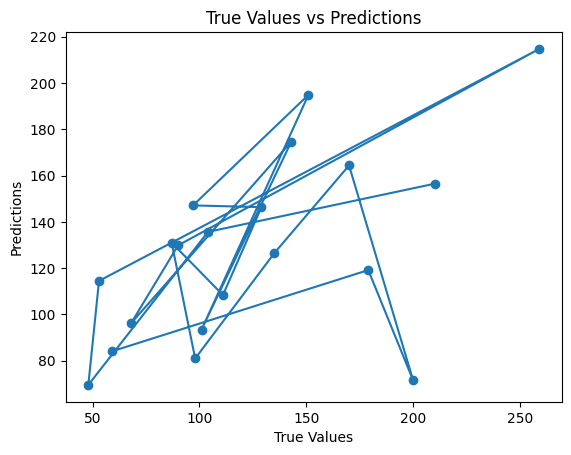

In [59]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error as mse

# Load diabetes dataset and use only two classes: setosa and versicolor for binary classification
disease = datasets.load_diabetes()
X = disease.data[:100]
y = disease.target[:100]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
Lg = LinearRegression()
Lg.fit(X_train, y_train)

# Predict on test set
y_pred = Lg.predict(X_test)

# Measure accuracy
accuracy = mse(y_test, y_pred)
print("Mean Squared Error:", accuracy)

plt.scatter(y_test, y_pred)
plt.plot(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()

In [70]:
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error as mse

disease = datasets.load_diabetes()

#disease
disease_x = disease.data[:,np.newaxis,2]
#disease_x = disease.data

#splitting the data into training or testing 
disease_x_train = disease_x[:-30]
disease_x_test = disease_x[-20:]

disease_y_train = disease.target[:-30]
disease_y_test = disease.target[-20:]

reg = linear_model.LinearRegression()
reg.fit(disease_x_train,disease_y_train)

#disease_x_test.size
# disease_y_test.size

y_pred = reg.predict(disease_x_test)
mse = mse(disease_y_test,y_pred)
mae = mean_absolute_error(disease_y_test,y_pred)

print(f'Mean Squared Errro:{mse}')

print(f'Mean Absolute Errro:{mae}')

weight = reg.coef_
intercept = reg.intercept_

print(weight,intercept)

Mean Squared Errro:2561.320427728385
Mean Absolute Errro:41.34577292446437
[941.43097333] 153.39713623331644


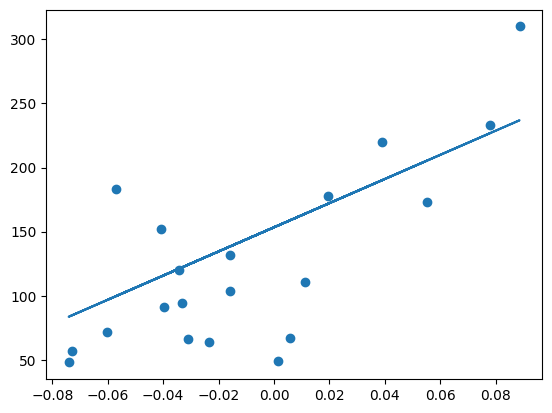

In [71]:
plt.scatter(disease_x_test,disease_y_test)
plt.plot(disease_x_test,y_pred)
plt.show()

In [24]:
# Decision Tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix , classification_report,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix

In [72]:
iris = sns.load_dataset('iris')
#iris = pd.read_csv('Iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [73]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [74]:
iris.isnull().any()
iris.shape

(150, 5)

array([[<Axes: xlabel='sepal_length', ylabel='sepal_length'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_length'>,
        <Axes: xlabel='petal_length', ylabel='sepal_length'>,
        <Axes: xlabel='petal_width', ylabel='sepal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='sepal_width'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_width'>,
        <Axes: xlabel='petal_length', ylabel='sepal_width'>,
        <Axes: xlabel='petal_width', ylabel='sepal_width'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_length'>,
        <Axes: xlabel='sepal_width', ylabel='petal_length'>,
        <Axes: xlabel='petal_length', ylabel='petal_length'>,
        <Axes: xlabel='petal_width', ylabel='petal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_width'>,
        <Axes: xlabel='sepal_width', ylabel='petal_width'>,
        <Axes: xlabel='petal_length', ylabel='petal_width'>,
        <Axes: xlabel='petal_width', ylabel='petal_width'>]], dtype=object)

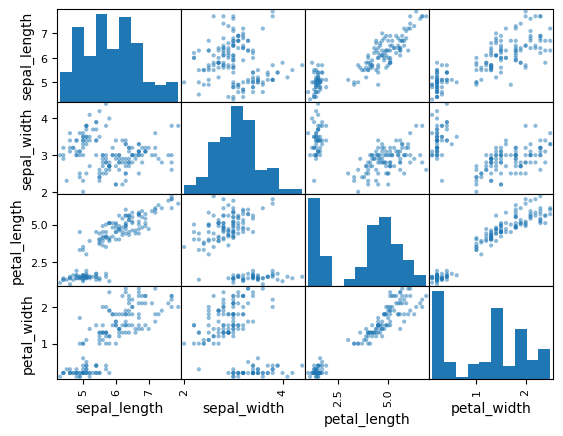

In [75]:
scatter_matrix(iris)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

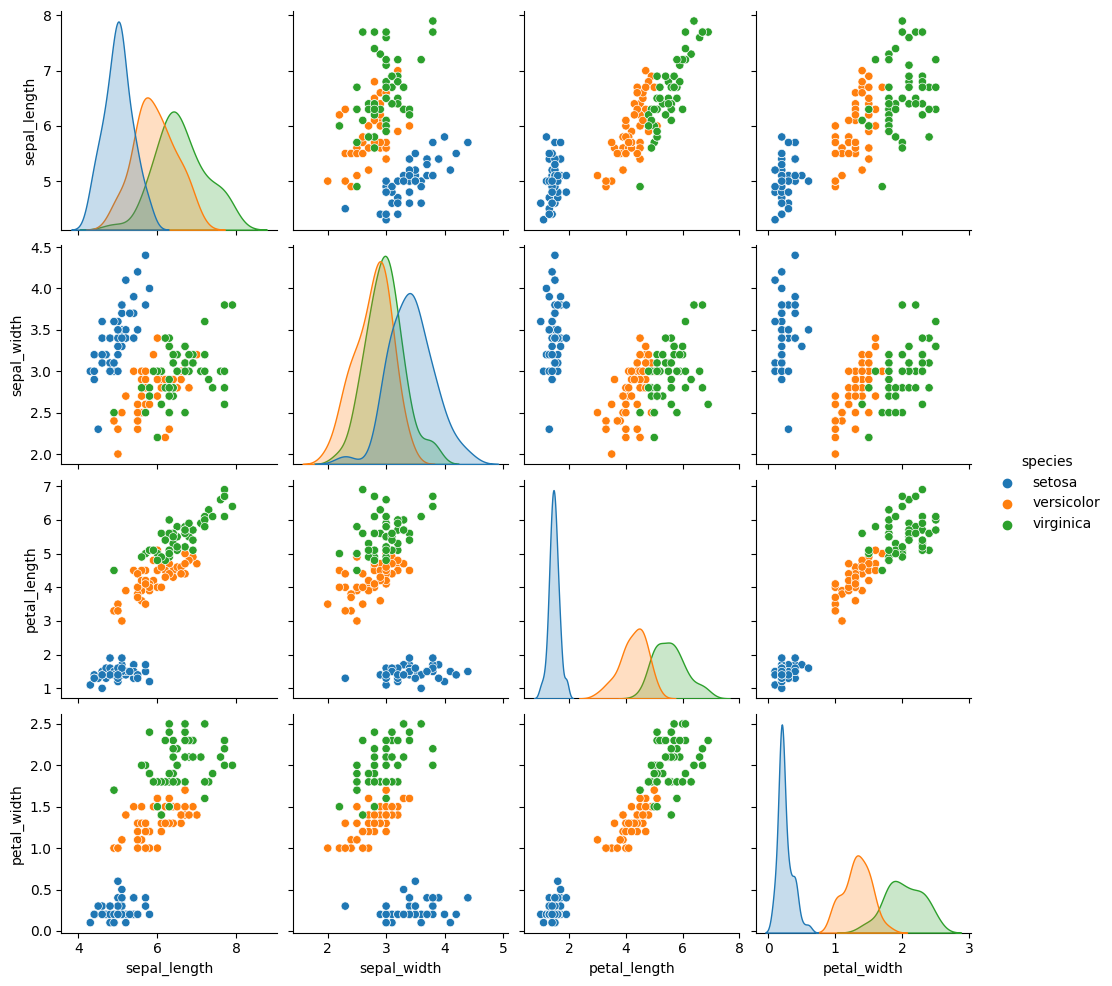

In [10]:
sns.pairplot(data=iris,hue='species')


In [11]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [76]:
#Label Encoding
iris['species'] = iris['species'].map({'setosa':0,'versicolor':1,'virginica':2})

<Axes: >

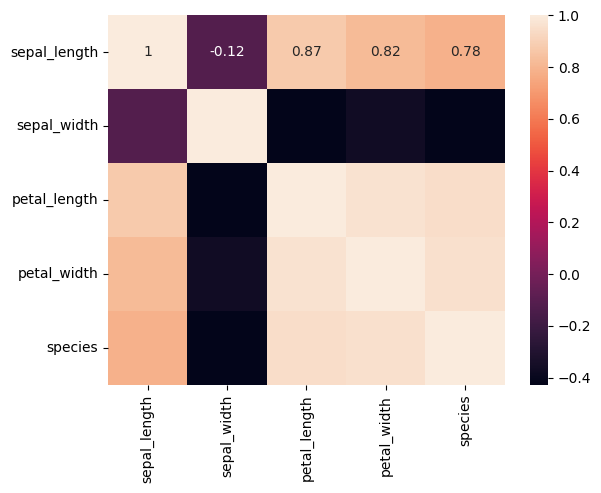

In [77]:
# Correlation matrix
sns.heatmap(iris.corr(),annot=True)

In [78]:
# Divided the data into target or feature
target = iris['species']
df1 = iris.copy()
df1 = df1.drop('species',axis=1)


In [79]:
# Label Encoding for categorical into numerical , because computer understand number
le = LabelEncoder()
y = le.fit_transform(target)
x = df1
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

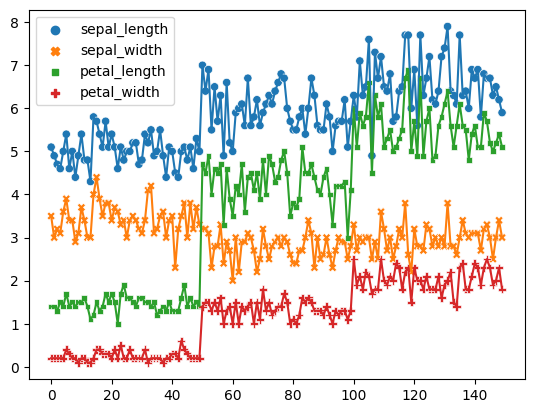

In [44]:
sns.scatterplot(x)
plt.plot(x)

In [80]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=40)

In [20]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
y_pred = dtree.predict(x_test)

In [47]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
38,4.4,3.0,1.3,0.2
66,5.6,3.0,4.5,1.5
115,6.4,3.2,5.3,2.3
117,7.7,3.8,6.7,2.2
89,5.5,2.5,4.0,1.3


In [60]:
dtree.predict([[4.4,3.0,1.3,0.2]])
dtree.predict([[5.6,3.0,4.5,1.5]])
dtree.predict([[6.4,3.2,5.3,2.3]])
dtree.predict([[7.7,3.8,6.7,2.2]])
dtree.predict([[5.5,2.5,4.0,1.3]])
dtree.predict([[5.6,3.5,5.0,1.3]]) # changing for testing 

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feat

array([2], dtype=int64)

In [50]:
y_test

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1], dtype=int64)

In [25]:
mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred)

0.0

In [26]:
confusion_matrix(y_test,y_pred)

array([[ 8,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 10]], dtype=int64)

In [27]:
print('\n',classification_report(y_test,y_pred))


               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [28]:
accuracy_score(y_test,y_pred)

1.0

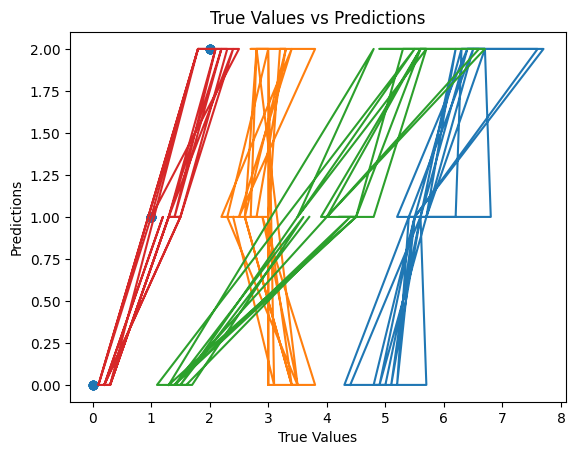

In [45]:
plt.scatter(y_test, y_pred)
plt.plot(x_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()

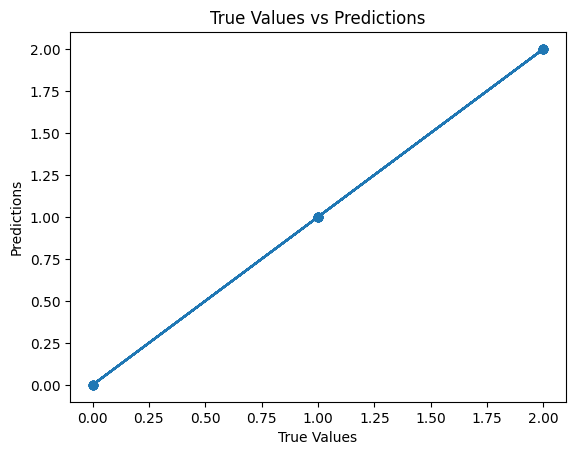

In [46]:
plt.scatter(y_test, y_pred)
plt.plot(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()

In [66]:
# iris['species'].unique

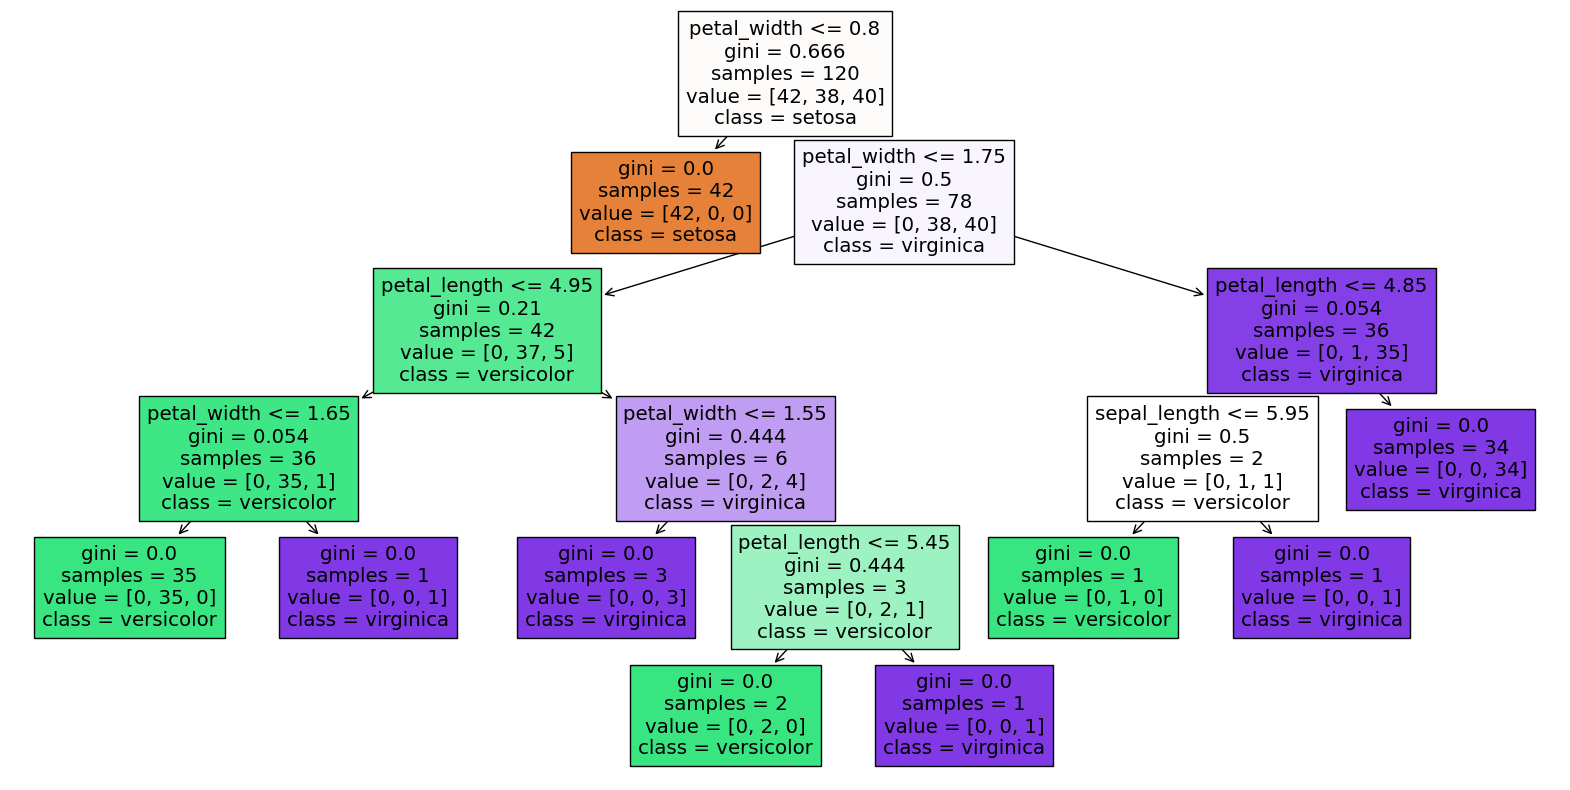

In [70]:
plt.figure(figsize=(20,10))
plot_tree(dtree,feature_names=x.columns,class_names=['setosa','versicolor','virginica'],filled=True)
plt.savefig('tree.png')

In [81]:
dtree = DecisionTreeRegressor()
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [82]:
y_pred = dtree.predict(x_test)

In [83]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
38,4.4,3.0,1.3,0.2
66,5.6,3.0,4.5,1.5
115,6.4,3.2,5.3,2.3
117,7.7,3.8,6.7,2.2
89,5.5,2.5,4.0,1.3


In [84]:
y_test

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1], dtype=int64)

In [88]:
dtree.predict([[4.4,3.0,1.3,0.2]])
dtree.predict([[5.6,3.0,4.5,1.5]])
dtree.predict([[6.4,3.2,5.3,2.3]])
dtree.predict([[7.7,3.8,6.7,2.2]])
dtree.predict([[5.5,2.5,4.0,1.3]])
dtree.predict([[5.6,3.5,5.0,1.3]]) # changing for testing 

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature 

array([2.])

In [85]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
62,6.0,2.2,4.0,1.0
23,5.1,3.3,1.7,0.5
26,5.0,3.4,1.6,0.4
48,5.3,3.7,1.5,0.2
2,4.7,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
12,4.8,3.0,1.4,0.1
50,7.0,3.2,4.7,1.4
7,5.0,3.4,1.5,0.2


In [86]:
y_train

array([1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 2, 2, 0, 2, 2, 1, 0, 2, 1,
       1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 1,
       0, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 0, 2, 1, 1, 0, 0, 0, 2, 2, 1, 0,
       1, 2, 2, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1, 2, 0, 2, 2, 1, 1, 0, 2, 1,
       0, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 2, 0, 2, 1, 0, 0, 2, 0, 1,
       1, 1, 1, 0, 2, 1, 0, 1, 0, 1], dtype=int64)

In [89]:
mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred)

(0.0, 0.0)

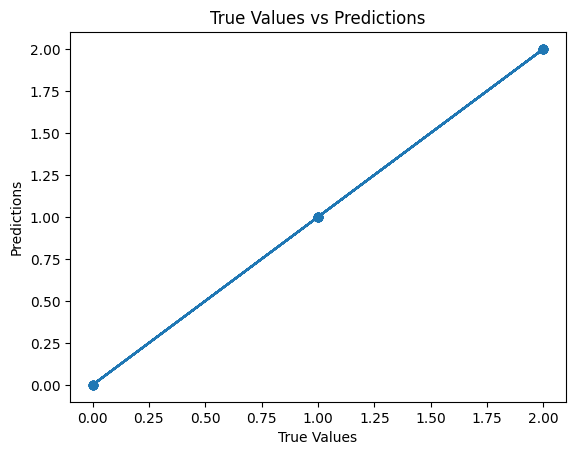

In [90]:
plt.scatter(y_test, y_pred)
plt.plot(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()

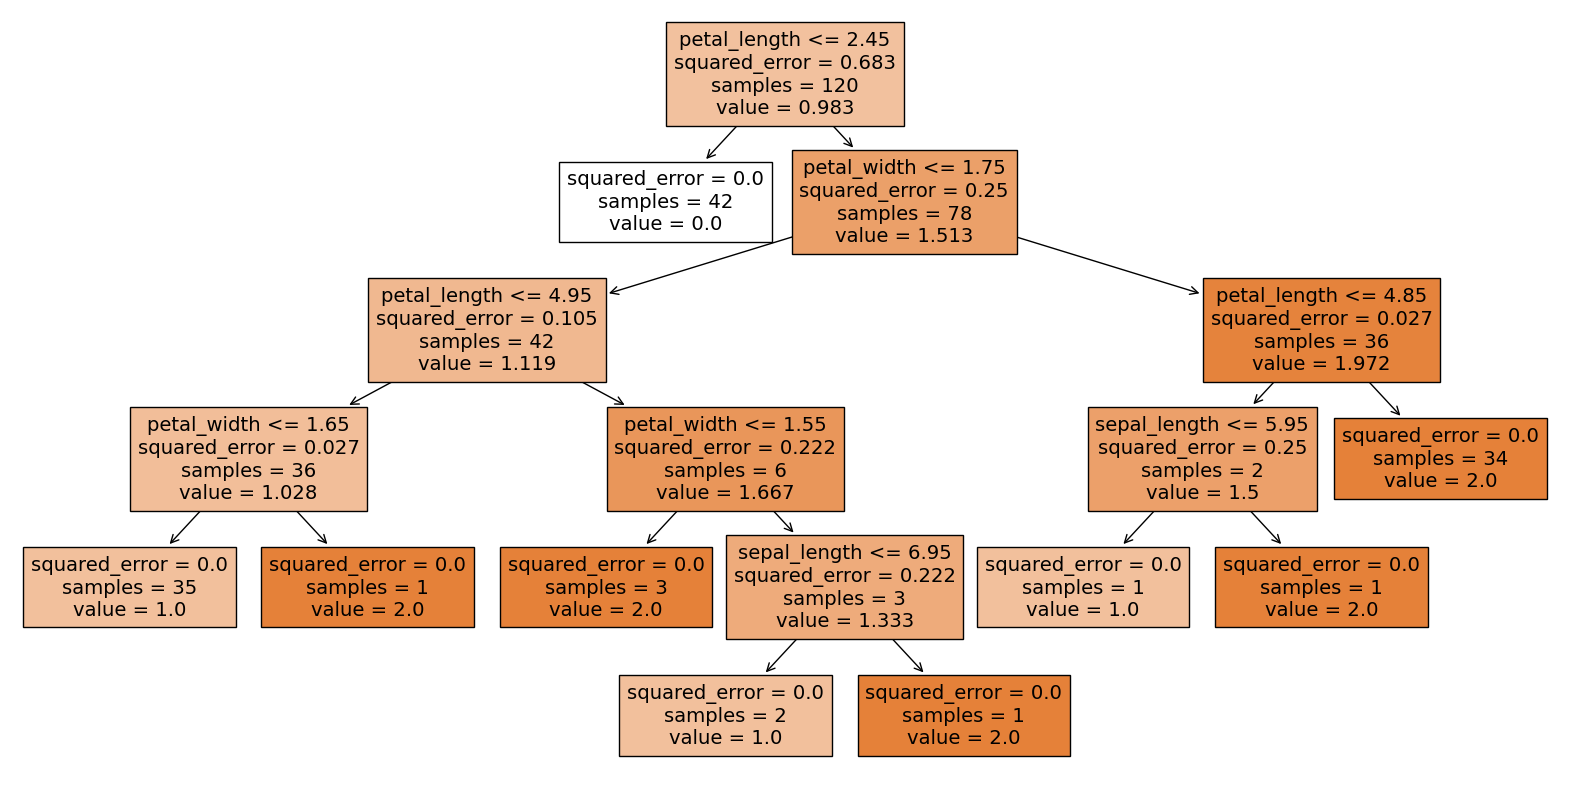

In [91]:
plt.figure(figsize=(20,10))
plot_tree(dtree,feature_names=x.columns,class_names=['setosa','versicolor','virginica'],filled=True)
plt.savefig('tree.png')

In [1]:
# Random Forest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor,RandomTreesEmbedding
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix , classification_report,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix

In [2]:
#dataset = sns.load_dataset('penguins')
dataset= pd.read_csv('penguins_lter.csv')
dataset.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
